# Heart attack prediction 

#### 大致參考了 kaggle網站裡面 Rishabh Arya的程式碼 名稱是 
Heart Attack Analysis - Beginner friendly....💘🤓



##### 網站：https://www.kaggle.com/aryarishabh/heart-attack-analysis-beginner-friendly-90

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info() ## look up type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.nunique() ## Gross glace data categorical condition.

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

# About this data:
About this dataset

Age : Age of the patient

Sex : Sex of the patient (male=1, female=0)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df.isna().sum() # check up na value.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## About sex distribution

In [6]:
pd.value_counts(df['sex']) # male=1, female=0

1    207
0     96
Name: sex, dtype: int64

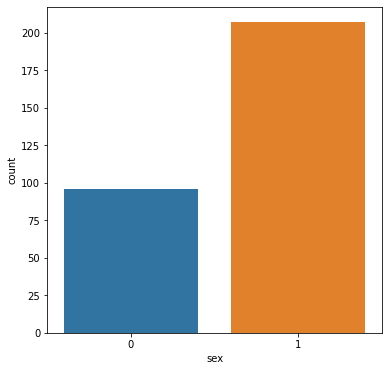

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(x="sex", data=df);

## About output distribution:

In [8]:
pd.value_counts(df['output']) # male=1, female=0

1    165
0    138
Name: output, dtype: int64

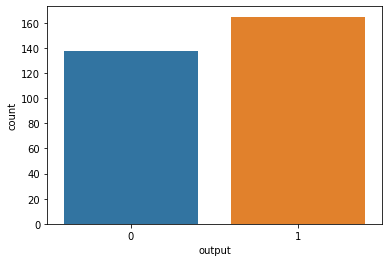

In [9]:
sns.countplot(x="output", data=df);

## About age distribution:

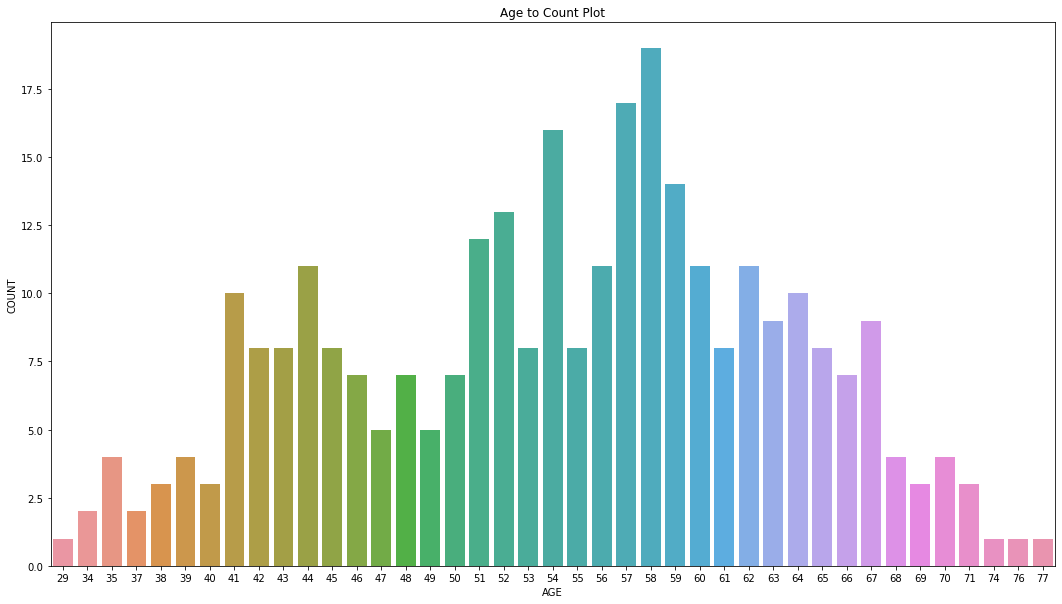

In [10]:
plt.figure(figsize=(18, 10))
sns.countplot(x=df["age"]);  # using countplot
plt.title("Age to Count Plot")
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.show();

## Other way for brief glance of data
       -pip install pandas_profiling 

In [11]:
import pandas_profiling as profile

In [12]:
#profile.ProfileReport(df)

## Data variable correlation

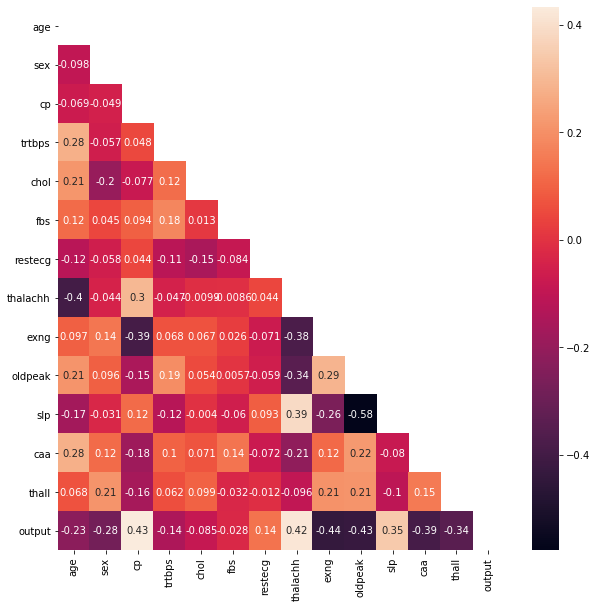

In [13]:
corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool) #
mask[np.triu_indices_from(mask)] = True  #
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

# Prepare data:

In [14]:
X_data = df.drop(['output'], axis = 1)
X_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
Y_data = df['output']
Y_data

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [36]:
print('X shape: ',X_data.shape)
print('Y shape: ',Y_data.shape)

X shape:  (303, 13)
Y shape:  (303,)


# Scaling the numerical features

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)?

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [48]:
from sklearn.preprocessing import MinMaxScaler

num_features = ['age','trtbps','chol','thalachh','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

scaler.fit(X_data[num_features])
X_scaled = pd.DataFrame(scaler.transform(X_data[num_features]),columns=num_features)
X_scaled = pd.concat([X_scaled, X_data[cat_features]], axis=1)
X_scaled.head()

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,3,1,0,0,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,2,0,1,0,0,0,2
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,1,0,0,0,2,0,2
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,1,0,1,0,2,0,2
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,0,0,1,1,2,0,2


# Prepare traning data set and test data set

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_data,train_size=0.75,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
x_train

(227, 13) (227,)
(76, 13) (76,)


,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
287,0.583333,0.566038,0.242009,0.709924,0.000000,1,1,0,0,0,2,1,2
282,0.625000,0.301887,0.210046,0.480916,0.354839,1,2,1,1,0,1,1,1
197,0.791667,0.292453,0.292237,0.702290,0.032258,1,0,1,1,0,1,2,3
158,0.604167,0.292453,0.214612,0.557252,0.064516,1,1,0,1,0,1,4,3
164,0.187500,0.415094,0.111872,0.778626,0.000000,1,2,0,1,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.437500,0.433962,0.244292,0.702290,0.096774,1,2,0,1,0,1,1,3
71,0.458333,0.000000,0.230594,0.633588,0.000000,1,2,0,1,1,2,1,3
106,0.833333,0.622642,0.246575,0.458015,0.016129,1,3,1,0,0,1,1,2
270,0.354167,0.245283,0.280822,0.557252,0.129032,1,0,0,0,0,2,0,3


# Model prediction
## KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = range(1,x_train.shape[1])
training_accuracy = [] 
testing_accuracy = []

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors =n)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    testing_accuracy.append(knn.score(x_test, y_test))
    print(f'knn(n = {n}): train accuracy = ', '{:.2f}, testing accuracy= {:.2f}'.format(training_accuracy[n-1], testing_accuracy[n-1]))



knn(n = 1): train accuracy =  1.00, testing accuracy= 0.82
knn(n = 2): train accuracy =  0.89, testing accuracy= 0.74
knn(n = 3): train accuracy =  0.90, testing accuracy= 0.87
knn(n = 4): train accuracy =  0.90, testing accuracy= 0.78
knn(n = 5): train accuracy =  0.90, testing accuracy= 0.83
knn(n = 6): train accuracy =  0.89, testing accuracy= 0.80
knn(n = 7): train accuracy =  0.88, testing accuracy= 0.87
knn(n = 8): train accuracy =  0.89, testing accuracy= 0.84
knn(n = 9): train accuracy =  0.87, testing accuracy= 0.87
knn(n = 10): train accuracy =  0.88, testing accuracy= 0.84
knn(n = 11): train accuracy =  0.87, testing accuracy= 0.87
knn(n = 12): train accuracy =  0.87, testing accuracy= 0.86


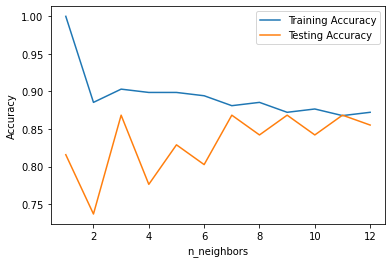

In [67]:
plt.plot(n_neighbors, training_accuracy, label='Training Accuracy')
plt.plot(n_neighbors, testing_accuracy, label = 'Testing Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [81]:
best_predict_k =testing_accuracy.index(max(testing_accuracy))+1
print(f'max testing accuracy, when k={best_predict_k}, accuracy ={max(testing_accuracy)}')


max testing accuracy, when k=3, accuracy =0.868421052631579


In [100]:
Each_model_dict = {} ##prepare for further used.
knn_best_testing_predict_model = KNeighborsClassifier(n_neighbors=best_predict_k)
Each_model_dict['knn_model (k= {})'.format(best_predict_k)] = knn_best_testing_predict_model
knn_best_testing_predict_model.fit(X_scaled, Y_data)
knn_best_testing_model_predict =  knn_best_testing_predict_model.predict(X_scaled)

{'knn_model (k= 3)': KNeighborsClassifier(n_neighbors=3)}


# Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10) ##
logreg.fit(x_train, y_train)
print('Traing Score:', logreg.score(x_train, y_train))
print('Testing Score:', logreg.score(x_test, y_test))

Each_model_dict['Logistic Regression'] = logreg

Traing Score: 0.8590308370044053
Testing Score: 0.8421052631578947


# Linear SVC

In [126]:
from sklearn.svm import LinearSVC
linearsvm = LinearSVC().fit(x_train,y_train)
#print("Coefficient :",linearsvm.coef_)
#print("Intercept :",linearsvm.intercept_)
print("Trainig Score:",linearsvm.score(x_train, y_train))
print("Testing Score:",linearsvm.score(x_test, y_test))

Trainig Score: 0.8458149779735683
Testing Score: 0.8421052631578947


In [149]:
Each_model_dict['Linear SVC'] = linearsvm

# Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(tree.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(tree.score(x_test,y_test)))

Training Accuracy 0.903
Testing Accuracy 0.816


In [151]:
Each_model_dict['Decision Tree Classifier'] = tree

# MLP Classifier

In [152]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier().fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(clf.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(clf.score(x_test,y_test)))

Training Accuracy 0.872
Testing Accuracy 0.868


In [166]:
Each_model_dict['MLP Classifier'] = clf

# Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,max_depth=4).fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(rf.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(rf.score(x_test,y_test)))

Training Accuracy 0.921
Testing Accuracy 0.842


In [155]:
Each_model_dict['Random Forest Classifier'] = rf

# Grandient Boosting Classifier

In [164]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
gbrt.fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(gbrt.score(x_train, y_train)))
print("Testing Accuracy {:.3f}".format(gbrt.score(x_test, y_test)))

Training Accuracy 0.620
Testing Accuracy 0.763


In [157]:
Each_model_dict['Grandient Boosting Classifier'] = gbrt

# AdaBoost Classifier

In [158]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.05)
ada.fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(ada.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(ada.score(x_test,y_test)))

Training Accuracy 0.943
Testing Accuracy 0.803


In [159]:
Each_model_dict['AdaBoost Classifier'] = ada

# LightGBM

In [165]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(max_depth=1,learning_rate=0.1,reg_alpha=0.05,reg_lambda=0.01)
lgbm.fit(x_train, y_train)
print("Training Accuracy {:.3f}".format(lgbm.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(lgbm.score(x_test,y_test)))

Training Accuracy 0.875
Testing Accuracy 0.842


In [171]:
Each_model_dict['LightGBM'] = lgbm

# Ensemble Bagging

In [175]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
Ensemble_base_dict = {'DecisionTreeClassifier':DecisionTreeClassifier(), 'LinearSVC':LinearSVC(), 'GaussianNB':GaussianNB()}


In [180]:
for clf in Ensemble_base_dict:
    bagging=BaggingClassifier(base_estimator=Ensemble_base_dict[clf],n_estimators=10,
                          bootstrap=True,bootstrap_features=True,max_features=3,max_samples=0.7)
    bagging.fit(x_train, y_train)
    print('Bagging Model :', clf)
    print("Training Accuracy {:.3f}".format(bagging.score(x_train,y_train)))
    print("Testing Accuracy {:.3f}\n".format(bagging.score(x_test,y_test)))
    Each_model_dict[f'En_bagging({clf})'] = bagging
    

Bagging Model : DecisionTreeClassifier
Training Accuracy 0.947
Testing Accuracy 0.724

Bagging Model : LinearSVC
Training Accuracy 0.806
Testing Accuracy 0.855

Bagging Model : GaussianNB
Training Accuracy 0.753
Testing Accuracy 0.868



# Dense layer based ANN Classifier

In [98]:
import keras
import tensorflow as tf

# Each Model ROC


In [181]:
print(Each_model_dict)

{'knn_model (k= 3)': KNeighborsClassifier(n_neighbors=3), 'Logistic Regression': LogisticRegression(C=10), 'Linear SVC': LinearSVC(), 'Decision Tree Classifier': DecisionTreeClassifier(max_depth=4), 'MLP Classifier': MLPClassifier(), 'Random Forest Classifier': RandomForestClassifier(max_depth=4, n_estimators=500), 'Grandient Boosting Classifier': GradientBoostingClassifier(), 'AdaBoost Classifier': AdaBoostClassifier(learning_rate=0.05, n_estimators=1000), 'LightGBM': LGBMClassifier(max_depth=1, reg_alpha=0.05, reg_lambda=0.01), 'Ensemble_bagging(DecisionTreeClassifier)': BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_features=3, max_samples=0.7), 'Ensemble_bagging(LinearSVC)': BaggingClassifier(base_estimator=LinearSVC(), bootstrap_features=True,
                  max_features=3, max_samples=0.7), 'Ensemble_bagging(GaussianNB)': BaggingClassifier(base_estimator=GaussianNB(), bootstrap_features=True,
                  max_feat

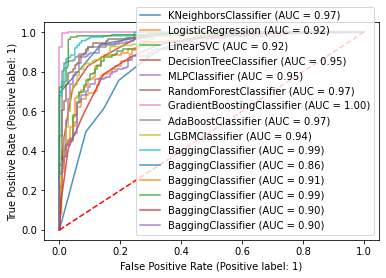

In [182]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc

for name in Each_model_dict:
    Each_model_dict[name].fit(X_scaled, Y_data)
    ax = plt.gca()
    plt.plot(ax=ax, alpha=0.8)
    plot_roc_curve(Each_model_dict[name], X_scaled, Y_data, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1],'r--',label ='AUC = 0.50')
plt.show()

[0.         0.13768116 1.        ] [0.         0.93939394 1.        ] [2 1 0]
0.9008563899868248
